In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.cluster import MeanShift 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 

df = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
df = df[(df.artist_name == 'Big Sean') | \
  (df.artist_name == 'J. Cole') | \
  (df.artist_name == 'Wale') | \
  (df.artist_name == 'Jeremih') | \
  (df.artist_name == 'Meek Mill') | \
    (df.artist_name == 'Drake')]
df

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
621,Drake,3mvYQKm8h6M5K5h0nVPY9S,After Dark (feat. Static Major &amp; Ty Dolla ...,0.04140,0.686,289560,0.428,0.000000,2,0.1380,-13.072,1,0.1920,141.950,4,0.329,71
1189,Wale,2jdWwK988PmmkBDA76PhmO,Cassius (Excellency) (feat. DJ Money),0.67100,0.603,221196,0.652,0.000000,1,0.4590,-6.719,1,0.3910,109.278,5,0.487,37
2890,Big Sean,1a7mrLcVQWaFa1vBXdX3qg,In the Dark,0.00437,0.614,224209,0.711,0.000000,7,0.2250,-7.145,1,0.3060,90.467,4,0.250,0
3122,Wale,58NFEq12nMvczhXgXVCsXW,Negotiations,0.60700,0.642,186549,0.865,0.000000,10,0.0883,-1.711,1,0.3780,100.940,4,0.735,39
3407,Wale,3VgKiVJi6feRzebn1kwPtS,It's Complicated,0.56800,0.443,199186,0.641,0.000000,11,0.1750,-6.151,1,0.4240,73.064,4,0.417,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128686,Jeremih,4bK5YVykN1IkXMDzVyeRKR,Lie 2 Me,0.17200,0.642,198840,0.444,0.000000,8,0.0741,-7.842,1,0.3440,139.953,4,0.456,52
128738,Wale,65gLItwnVZpbl52nO10eFI,All Star Break Up,0.28600,0.750,216744,0.695,0.000000,2,0.3020,-6.495,1,0.2730,139.247,4,0.655,54
128792,Jeremih,79gqfa8TgRc6F3z5QrEiN8,These Days,0.18300,0.746,175867,0.412,0.000002,11,0.3770,-7.699,0,0.1140,123.755,4,0.435,50
128945,Jeremih,3bTSIHFVorXxkPKykuABt6,Imitate,0.15800,0.879,206733,0.373,0.000074,9,0.0767,-9.174,1,0.0629,108.031,4,0.524,60


In [51]:
# df = df[df.popularity >= 50]
# df.reset_index(inplace = True)
# df = scale(df[['energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'popularity']])
for column in df.columns:
    if(type(df[column][0]) != str):
        df[column] = scale([df[column]], axis = 1)[0]
df.drop(columns = ['duration_ms', 'track_id', \
                  'danceability', 'time_signature', 'mode'], inplace = True)
df = df[df.index % 20 == 0]
df.reset_index(inplace = True)
# df.drop(columns = ['valence', 'liveness'], inplace = True)
# df = df[(df.index % 100 == 0)]

# df = df[df.speechiness <= 0.5]


In [2]:
df.reset_index(inplace = True)

In [3]:
clustering = KMeans(n_clusters = 6)
x_axis = 'speechiness'
y_axis = 'tempo'
z_axis = 'energy'
clustering.fit(df[[x_axis, y_axis, z_axis]])
predictions = clustering.predict(df[[x_axis, y_axis, z_axis]])

In [4]:
clustering = MeanShift()
x_axis = 'tempo'
y_axis = 'speechiness'
z_axis = 'energy'
clustering.fit(df[[x_axis, y_axis, z_axis]])
# clustering.cluster_centers_
predictions = clustering.predict(df[[x_axis, y_axis, z_axis]])
predictions

array([1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1, 0, 3, 2, 0, 1, 0, 0,
       1, 3, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 3, 3, 1, 0, 1, 2, 0, 1, 3,
       3, 2, 0, 2, 3, 0, 3, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 3, 2, 3, 0, 1,
       0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 3, 1, 0, 2, 0, 0, 1, 0, 0, 0, 3,
       3, 3, 3, 0, 0, 0, 0, 3, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 3, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0])

In [10]:
for i in range(len(predictions)):
    if(predictions[i] == 0):
        print('(0)')
        print(df.track_name[i])
    elif(predictions[i] == 3):
        print('(3)')
        print(df.track_name[i])

(0)
In the Dark
(0)
It's Complicated
(0)
Cards Right
(0)
Living Single
(0)
Impor Limites
(0)
I Don't Fuck With You (feat. E-40)
(3)
Foldin Clothes
(0)
Bounce Back
(0)
Same Time Pt. 1
(0)
Lust for Life
(3)
The Outro
(0)
Congratulations
(0)
November 18th
(0)
Brand New
(0)
Winter Wars
(0)
Uptown (feat. Bun B & Lil Wayne)
(0)
Lust For Life
(0)
Say What's Real
(3)
Successful (feat. Trey Songz & Lil Wayne)
(3)
Best I Ever Had
(0)
Ignant Shit (feat. Lil Wayne)
(0)
Sooner Than Later
(3)
The Calm
(3)
Outro (feat. Chilly Gonzales)
(0)
Forever I'm Ready
(3)
Dummies
(0)
Effortless
(3)
8 Out Of 10
(0)
BRACKETS
(0)
Respect The Game
(0)
Cold Hearted II
(0)
1am
(0)
Window Pain - Outro
(3)
Ratchet Happy Birthday
(3)
My Boy (feat. J. Cole) - Freestyle
(0)
Once an Addict - Interlude
(0)
Ungrateful & Thankful
(0)
3 Days 3 Hours
(0)
Going Bad (feat. Drake)
(3)
Nonstop
(0)
In My Feelings
(0)
God's Plan
(0)
Nice For What
(0)
Mob Ties
(3)
What's Free (feat. Rick Ross & Jay Z)
(0)
Uptown Vibes (feat. Fabolous 

In [7]:
color_mapping = {1 : 'blue', 0 : 'lightcoral', 2 : 'green', 3 : 'purple'}
# color_mapping = {
#     'Drake' : 'lightblue',
#     'Big Sean' : 'red',
#     'J. Cole' : 'green',
#     'Wale' : 'yellow',
#     'Jeremih' : 'purple',
#     'Meek Mill' : 'black'
# }
clustering.cluster_centers_

array([[ 87.02559322,   0.26044746,   0.60928814],
       [139.13916216,   0.19816757,   0.59      ],
       [113.72278571,   0.19791429,   0.55557143],
       [166.51038889,   0.32958333,   0.66044444]])

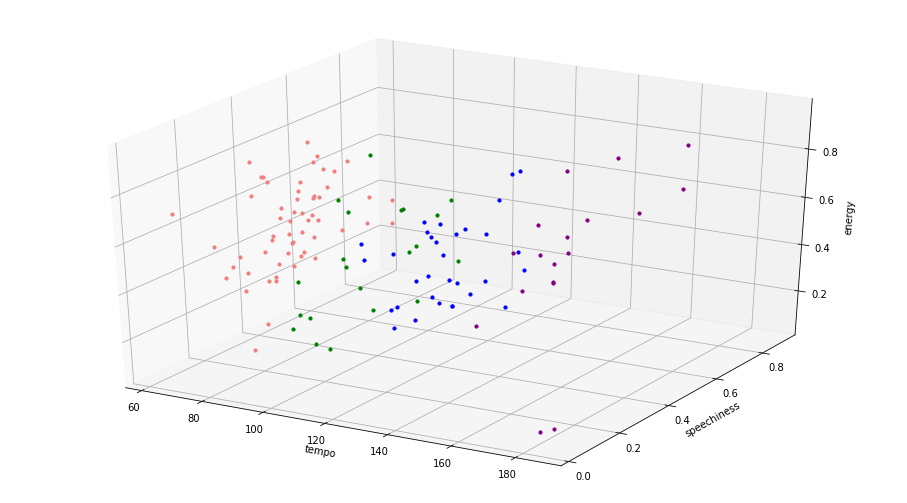

In [8]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')
for i in range(len(df)):
    ax.scatter(df[x_axis][i], df[y_axis][i], df[z_axis][i], \
        c = color_mapping[predictions[i]], s = 10)
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
ax.set_zlabel(z_axis)
plt.show()

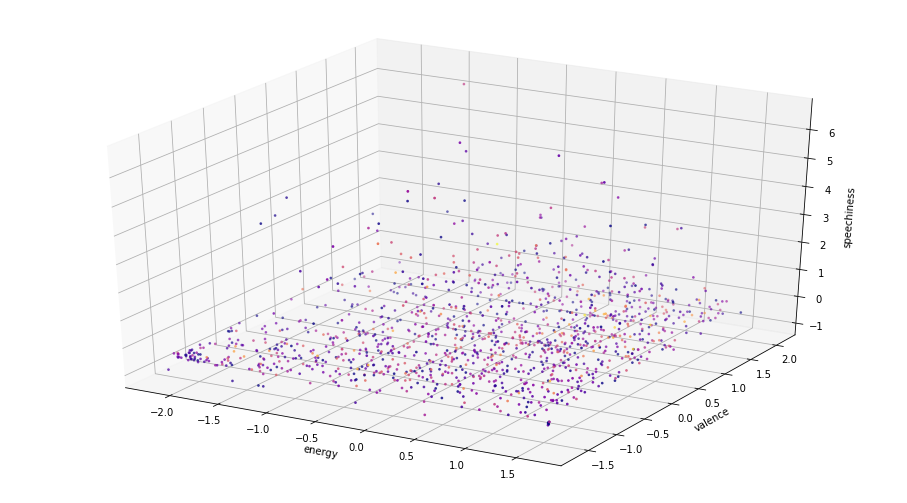

In [173]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')
x_axis = 'valence'
y_axis = 'energy'
z_axis = 'speechiness'
ax.scatter(df[x_axis], df[y_axis], df[z_axis], cmap = 'plasma', c = df.popularity, s = 3)
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
ax.set_zlabel(z_axis)
# plt.scatter(df['speechiness'], df['valence'], s = 10, cmap = 'hot', c = normalize([df['popularity']])[0])
# plt.scatter(df[x_axis], df[y_axis], s = 5, cmap = 'plasma', c)
# plt.xlabel(x_axis)
# plt.ylabel(y_axis)
plt.show()

In [27]:
for i in range(len(df.var())):
    
    print(df.var()[i] * 10**6)
df.var()

3.7620399265787685
1.2811495006040157
5.394121257004852
2.419557760164896
3.833539831279
2.3173767363376396
3.0381442972054504
4.777133816694987
1.941833364458898
3.0012406360530575


acousticness        0.000004
energy              0.000001
instrumentalness    0.000005
key                 0.000002
liveness            0.000004
loudness            0.000002
mode                0.000003
speechiness         0.000005
valence             0.000002
popularity          0.000003
dtype: float64

In [26]:
corr_matrix = df.corr()
for i in range(len(corr_matrix)):
    for column in corr_matrix.columns:
        if(corr_matrix[column][i] >= 0.4 and corr_matrix[column][i] != 1):
            print(corr_matrix.index[i])
            print(column)
            print()

energy
loudness

loudness
energy

